### Loading our libraries 

In [102]:
#Importing Regular Expressions module 
import re

# Importing numpy 
import numpy as np

# ....... Pandas 
import pandas as pd

# ........ Tensorflow 
import tensorflow as tf
# ......... Matplotlib 
import matplotlib.pyplot as plt

# ..........Pandas 
import pandas as pd

# Importing train test split from Sklearn 
from sklearn.model_selection import train_test_split

import os

# load the libraries
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import cv2
from tqdm import tqdm

from PIL import Image

import sys

import csv


### Data Loading

In [103]:
DATADIR = "/Users/cyprian/Documents/covid19-pneumonia-normal-chest-xraypa-dataset 2/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset"


CATEGORIES = ['covid', 'normal', 'pneumonia']






In [110]:
#Useful function
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)

    for root, dirs, files in os.walk(myDir, topdown=False):

        for name in files:

            if name.endswith(format):

                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList




### Visualize the data 

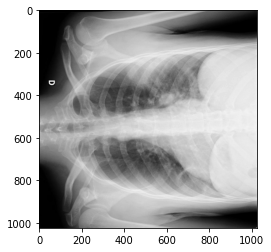

In [82]:
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray') 
        plt.show() 

        break 
    break  

In [83]:
print(img_array)

[[  0   0   0 ... 102 181 252]
 [  0   0   0 ...  59 101 143]
 [  0   0   0 ...  37  48  63]
 ...
 [  2   2   2 ...  33  56  80]
 [  2   2   2 ...  84 150 204]
 [  2   2   2 ... 201 239 255]]


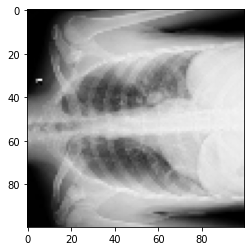

In [84]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

### Building our training data!

In [85]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

              

100%|██████████| 1526/1526 [00:13<00:00, 112.91it/s]

4575


### Shuffling our data 

Next, we want to shuffle the data. Right now our data is just all pneumonia, then normal and covid. This will usually end up causing trouble as, initially, the classifier will learn to just predict  pneumonia, normal and covid

In [86]:
import random

random.shuffle(training_data)

### Viewing  the shaffled data.

In [87]:
for sample in training_data[:100]:
    print(sample[1])

0
2
1
2
1
1
2
1
1
2
0
2
2
2
1
1
1
1
1
0
1
1
0
2
0
1
2
2
2
1
2
2
0
2
0
1
0
0
2
1
2
1
1
1
0
2
0
0
2
2
0
2
1
0
2
1
2
0
1
2
2
0
2
2
0
2
0
0
1
0
0
2
0
2
1
2
2
1
1
2
0
2
2
1
1
2
2
0
0
2
0
0
2
0
0
0
0
1
0
0


### Making our model 

In [88]:
X=[]
y=[]

In [89]:

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[248]
   [254]
   [239]
   ...
   [220]
   [254]
   [254]]

  [[235]
   [253]
   [206]
   ...
   [135]
   [252]
   [253]]

  [[238]
   [253]
   [201]
   ...
   [151]
   [252]
   [251]]

  ...

  [[239]
   [252]
   [196]
   ...
   [138]
   [253]
   [250]]

  [[240]
   [248]
   [206]
   ...
   [152]
   [251]
   [251]]

  [[250]
   [250]
   [248]
   ...
   [238]
   [250]
   [251]]]]


In [90]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### Loading our current scripts 

### Making the predictions 

In [91]:
# Loading the libraries 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [101]:
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import layers

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0


model = Sequential()

# model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

num_classes = 3

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


model.fit(X, y, callbacks=[EarlyStopping(monitor='accuracy', mode='max')],  batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3
101/101 [==============================] - 22s 208ms/step - loss: 1.0990 - accuracy: 0.3392 - val_loss: 1.0986 - val_accuracy: 0.3409
Epoch 2/3
101/101 [==============================] - 18s 179ms/step - loss: 1.0987 - accuracy: 0.3148 - val_loss: 1.0987 - val_accuracy: 0.3197


### Final Predictions 